In [ ]:
!pip install pmlb numpy pandas matplotlib scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
!pip install seaborn imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pmlb import fetch_data
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [ ]:
data = fetch_data('fars')
for i in data.describe():
    print(i)

CASE_STATE
AGE
SEX
PERSON_TYPE
SEATING_POSITION
RESTRAINT_SYSTEM-USE
AIR_BAG_AVAILABILITY/DEPLOYMENT
EJECTION
EJECTION_PATH
EXTRICATION
NON_MOTORIST_LOCATION
POLICE_REPORTED_ALCOHOL_INVOLVEMENT
METHOD_ALCOHOL_DETERMINATION
ALCOHOL_TEST_TYPE
ALCOHOL_TEST_RESULT
POLICE-REPORTED_DRUG_INVOLVEMENT
METHOD_OF_DRUG_DETERMINATION
DRUG_TEST_TYPE
DRUG_TEST_RESULTS_(1_of_3)
DRUG_TEST_TYPE_(2_of_3)
DRUG_TEST_RESULTS_(2_of_3)
DRUG_TEST_TYPE_(3_of_3)
DRUG_TEST_RESULTS_(3_of_3)
HISPANIC_ORIGIN
TAKEN_TO_HOSPITAL
RELATED_FACTOR_(1)-PERSON_LEVEL
RELATED_FACTOR_(2)-PERSON_LEVEL
RELATED_FACTOR_(3)-PERSON_LEVEL
RACE
target


In [ ]:
X,y = fetch_data('fars',return_X_y=True)
X,y

(array([[ 0, 34,  1, ..., 29, 19, 17],
        [ 0, 20,  1, ..., 29, 19, 17],
        [ 0, 43,  1, ..., 29, 19,  4],
        ...,
        [50,  7,  0, ..., 29, 19, 11],
        [50,  4,  0, ..., 29, 19, 11],
        [50, 61,  1, ..., 29, 19, 17]]), array([1, 1, 1, ..., 6, 6, 1]))

In [ ]:
X = pd.DataFrame(X)
#y = pd.DataFrame(y)
y = LabelEncoder().fit_transform(y)

In [ ]:
X.columns

RangeIndex(start=0, stop=29, step=1)

In [ ]:
print(X.shape,y.shape)

(100968, 29) (100968,)


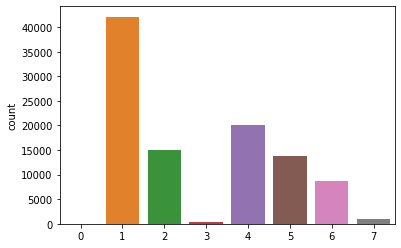

In [ ]:
sns.countplot(x=y)

In [ ]:
#oversample = RandomOverSampler(sampling_strategy='minority')
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X, y)

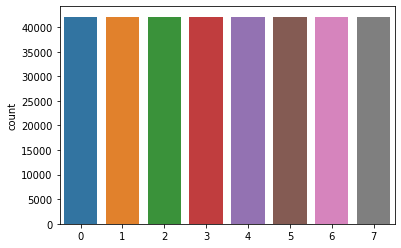

In [ ]:
sns.countplot(x=y_over)

In [ ]:
print(type(X_over),type(y_over))

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='newton-cg', multi_class='multinomial', random_state = 10)
classifier.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=10,
                   solver='newton-cg')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)


pred_y = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

df_pred =pd.DataFrame(pred_y,index=None)
column_names = ['y_pred','y_test']
df_pred.columns = column_names

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10164     0     0   205   266     0    29     0]
 [  171  9082   223   210   378   161   167   140]
 [   71    65  4024  1597     5  4742   255     8]
 [   19    90   890  6559   187  2084   274   308]
 [  510   113     3     8  8892    15    98   770]
 [   73   108  1831  1571   340  5938   589    44]
 [  211   170   730   949  2885  3767  1625   121]
 [  121   167    11    47   889    37   306  8919]]


In [ ]:
accuracy_score(y_test, y_pred)

0.6553685060309621

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10662     0     0     0     1     1     0     0]
 [    0 10512     1     0     4     0     0    15]
 [    0     0  8584    46     7  1529   595     6]
 [    0     0     6 10387     0    10     8     0]
 [    0     0     7     5  9526    72   650   149]
 [    0     0  1826    50   212  7391   991    24]
 [    0     0   774    43  1085   996  7538    22]
 [    0     1     4     3    41     2     9 10437]]


0.8908372115110647

#K - nearest neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10663     0     0     0     0     1     0     0]
 [    0 10472    18     2     6    13     2    19]
 [    0    11  7562   148     8  2246   782    10]
 [    0     0     9 10374     0    19     9     0]
 [   11     2    23    24  9113    88   895   253]
 [    7     4  2404   149   284  6397  1218    31]
 [    1     0  1106   114  1304  1347  6511    75]
 [    0     1     5     4    68     9    24 10386]]


0.8485848608604806

[[10663     0     0     0     0     1     0     0]
 [    0 10472    18     2     6    13     2    19]
 [    0    11  7562   148     8  2246   782    10]
 [    0     0     9 10374     0    19     9     0]
 [   11     2    23    24  9113    88   895   253]
 [    7     4  2404   149   284  6397  1218    31]
 [    1     0  1106   114  1304  1347  6511    75]
 [    0     1     5     4    68     9    24 10386]]


0.8485848608604806

# SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10556     0     0     1   107     0     0     0]
 [  129  9241    26   178   352   330   143   133]
 [   11    51  3504  1256     5  5838    92    10]
 [   13    89   693  6967   213  2102   217   117]
 [  242    70     2     5  9421    17    31   621]
 [   24    70  1248  1168   392  7124   417    51]
 [   72   129   407   756  2989  4568  1453    84]
 [   99   115     3    34   878    35   352  8981]]


0.679634818121379

In [ ]:
from sklearn.model_selection import GridSearchCV

params = [{'C':[0.25,0.5,0.75,1],"kernel":['linear']},
              {'C':[0.25,0.5,0.75,1],"kernel":['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]

GS = GridSearchCV(estimator = classifier,
                 param_grid=params,
                 scoring = 'accuracy',
                 cv = 10,
                 n_jobs = -1)

GS.fit(X_train,y_train)

best_accuracy = grid_search.best_score_

optimized_para = grid_search.best_params_


print("Best Accuracy: {:.2f} %".format(best_accuracy.mean()*100))

print ("optimized parameters:".format(optimized_para))

y_pred = GS.predict(X_test)
accuracy_score(y_test, y_pred)

# Decision tree classifier

**RandomizedSearchCV -- Hyperparameter tuning**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

In [ ]:

params = {'max_depth' : [5,8,15,None],
         'max_features': ['sqrt','log2',None],
         }
dt = DecisionTreeClassifier()
scorer = make_scorer(f1_score, average = 'weighted')
rdt = RandomizedSearchCV(dt, param_distributions=params, scoring= scorer, verbose=1, cv=2)
rdt.fit(X_train,y_train)


Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [5, 8, 15, None],
                                        'max_features': ['sqrt', 'log2', None]},
                   scoring=make_scorer(f1_score, average=weighted), verbose=1)

In [ ]:
rdt.best_score_

0.8457348318867841

In [ ]:
rdt.best_params_

{'max_features': None, 'max_depth': None}

In [ ]:
modelD = DecisionTreeClassifier(max_features= None,max_depth=None,criterion='entropy')
modelD.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_on_test = modelD.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred_on_test)

0.8824674707949473

# K-fold CV

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
accuracies = cross_val_score(estimator=dt, X =X_train, y=y_train,cv=100)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

print ("Standard deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 87.81 %
Standard deviation: 0.59%
